In [1]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import pandas as pd
import csv


# Import matplotlib libraries
from matplotlib import pyplot as plt

# Training

In [54]:
keypts_data=pd.read_csv("train.csv")
keypts_data=keypts_data.dropna()
keypts_data.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
1,0.786219,0.870219,0.780104,0.877386,0.779377,0.875384,0.754742,0.863472,0.755459,0.860472,...,0.575943,0.743863,0.439178,0.771758,0.430989,0.720005,0.330208,0.747289,0.303114,Bhujangasana
3,0.775227,0.879122,0.761516,0.882190,0.763890,0.880481,0.745867,0.858489,0.751119,0.857317,...,0.571094,0.743376,0.442854,0.771083,0.433099,0.723416,0.329023,0.749673,0.302236,Bhujangasana
5,0.657915,0.861576,0.640377,0.859831,0.642340,0.858728,0.644250,0.828227,0.648826,0.823555,...,0.579051,0.730606,0.447167,0.764983,0.438530,0.711451,0.338479,0.745072,0.302249,Bhujangasana
7,0.541323,0.774551,0.528623,0.769445,0.531242,0.766369,0.534882,0.735442,0.542299,0.732100,...,0.586506,0.744453,0.442331,0.766523,0.440847,0.727988,0.321242,0.755181,0.283036,Bhujangasana
9,0.521145,0.742420,0.508642,0.734031,0.511578,0.732600,0.516776,0.698156,0.525997,0.697749,...,0.573039,0.743826,0.434950,0.767857,0.437005,0.738430,0.309989,0.756184,0.287195,Bhujangasana


In [55]:
len(keypts_data)

3159

In [56]:
keypts_data=keypts_data.reset_index(drop=True)
keypts_data.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.786219,0.870219,0.780104,0.877386,0.779377,0.875384,0.754742,0.863472,0.755459,0.860472,...,0.575943,0.743863,0.439178,0.771758,0.430989,0.720005,0.330208,0.747289,0.303114,Bhujangasana
1,0.775227,0.879122,0.761516,0.882190,0.763890,0.880481,0.745867,0.858489,0.751119,0.857317,...,0.571094,0.743376,0.442854,0.771083,0.433099,0.723416,0.329023,0.749673,0.302236,Bhujangasana
2,0.657915,0.861576,0.640377,0.859831,0.642340,0.858728,0.644250,0.828227,0.648826,0.823555,...,0.579051,0.730606,0.447167,0.764983,0.438530,0.711451,0.338479,0.745072,0.302249,Bhujangasana
3,0.541323,0.774551,0.528623,0.769445,0.531242,0.766369,0.534882,0.735442,0.542299,0.732100,...,0.586506,0.744453,0.442331,0.766523,0.440847,0.727988,0.321242,0.755181,0.283036,Bhujangasana
4,0.521145,0.742420,0.508642,0.734031,0.511578,0.732600,0.516776,0.698156,0.525997,0.697749,...,0.573039,0.743826,0.434950,0.767857,0.437005,0.738430,0.309989,0.756184,0.287195,Bhujangasana


In [57]:
fields = ['Sample', 'Label'] 

with open('trial_train.csv', 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    

outer_list=[]
inner_list=[]
for i in range(0,len(keypts_data)-1):
    if(keypts_data['label'][i]==keypts_data['label'][i+1]):
        inner_list.append(keypts_data.iloc[i].drop('label').values)
    else:
        inner_list.append(keypts_data.iloc[i].drop('label').values)
        outer_list.append(inner_list)
        outer_list.append(keypts_data['label'][i])
        with open('trial_train.csv', 'a') as csvfile:
            csvwriter = csv.writer(csvfile) 
            csvwriter.writerow(outer_list)
        inner_list=[]
        outer_list=[]
        

In [2]:
final_train=pd.read_csv('final_train.csv')
final_train.head()

Sample         Label
0  [array([0.78621894, 0.87021947, 0.7801042, 0.8...  Bhujangasana
1  [array([0.5703675, 0.6776938, 0.5562466, 0.690...    Padamasana
2  [array([0.56614625, 0.45965046, 0.55293095, 0....     Shavasana
3  [array([0.24351352, 0.734712, 0.23264247, 0.74...      Tadasana
4  [array([0.3708398, 0.62254435, 0.35274792, 0.6...   Trikonasana

In [3]:
def get_array_from_string(arr_string):
  return [float(i) for i in re.findall(r'0.\d+', arr_string)]

In [4]:
import re
test=[]
outer_list=[]
test.append(final_train['Sample'])
# print(len(test[0][0].split(']')))
# print(len(test[0][0]))
# print(test[0])
for i in range(0,70):
    inner_list=[]
    for j in range(0,len(test[0][i].split(']'))-2): 
        res=test[0][i].split(']')[j]
        inner_list.append(get_array_from_string(res))
    outer_list.append(inner_list)


print(outer_list)
# print(type(outer_list))

[[[0.78621894, 0.87021947, 0.7801042, 0.87738633, 0.77937704, 0.8753842, 0.7547425, 0.86347234, 0.75545913, 0.86047244, 0.7497095, 0.8122004, 0.7793317, 0.81107634, 0.7556961, 0.68825954, 0.7984366, 0.69402623, 0.78506917, 0.6002404, 0.8078833, 0.5847824, 0.7335595, 0.5786643, 0.74406546, 0.5759433, 0.7438633, 0.43917832, 0.77175796, 0.43098912, 0.72000456, 0.33020774, 0.7472891, 0.30311382], [0.7752273, 0.87912154, 0.7615156, 0.88218987, 0.7638898, 0.880481, 0.74586654, 0.85848904, 0.7511187, 0.8573169, 0.74968785, 0.8038533, 0.78395736, 0.803237, 0.7541457, 0.68630564, 0.78687453, 0.68783003, 0.78530014, 0.6061284, 0.8075648, 0.59034526, 0.72953904, 0.571646, 0.74228215, 0.5710942, 0.74337554, 0.4428535, 0.77108294, 0.43309897, 0.7234162, 0.32902282, 0.7496727, 0.30223575], [0.65791464, 0.8615759, 0.6403765, 0.85983056, 0.64234, 0.8587276, 0.64424956, 0.82822734, 0.64882606, 0.82355535, 0.6637171, 0.7666503, 0.6844162, 0.7744477, 0.69224685, 0.68377215, 0.7217392, 0.6856886, 0.729154

In [5]:
y_train=final_train['Label']
y_train

0     Bhujangasana
1       Padamasana
2        Shavasana
3         Tadasana
4      Trikonasana
          ...     
65      Padamasana
66       Shavasana
67        Tadasana
68     Trikonasana
69     Vrikshasana
Name: Label, Length: 70, dtype: object

In [6]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_train['Label']= label_encoder.fit_transform(final_train['Label'])

In [7]:
y_train=[]
y_train=final_train['Label']
y_train

0     0
1     1
2     2
3     3
4     4
     ..
65    1
66    2
67    3
68    4
69    5
Name: Label, Length: 70, dtype: int32

In [8]:
x_train=outer_list
x_train=np.array(x_train)
x_train.shape[0]

<ipython-input-8-912fd4716012>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train=np.array(x_train)


70

In [9]:
# padding
training=[]
for i in range(0,70):
    result = np.zeros((77, 34))
    result[:np.array(x_train[i]).shape[0],:np.array(x_train[i]).shape[1]]=x_train[i]
    training.append(result)

# print(np.array(result))

In [66]:
for lst in training[0]:
    print(lst)
print(type(training))

[0.78621894 0.87021947 0.7801042  0.87738633 0.77937704 0.8753842
 0.7547425  0.86347234 0.75545913 0.86047244 0.7497095  0.8122004
 0.7793317  0.81107634 0.7556961  0.68825954 0.7984366  0.69402623
 0.78506917 0.6002404  0.8078833  0.5847824  0.7335595  0.5786643
 0.74406546 0.5759433  0.7438633  0.43917832 0.77175796 0.43098912
 0.72000456 0.33020774 0.7472891  0.30311382]
[0.7752273  0.87912154 0.7615156  0.88218987 0.7638898  0.880481
 0.74586654 0.85848904 0.7511187  0.8573169  0.74968785 0.8038533
 0.78395736 0.803237   0.7541457  0.68630564 0.78687453 0.68783003
 0.78530014 0.6061284  0.8075648  0.59034526 0.72953904 0.571646
 0.74228215 0.5710942  0.74337554 0.4428535  0.77108294 0.43309897
 0.7234162  0.32902282 0.7496727  0.30223575]
[0.65791464 0.8615759  0.6403765  0.85983056 0.64234    0.8587276
 0.64424956 0.82822734 0.64882606 0.82355535 0.6637171  0.7666503
 0.6844162  0.7744477  0.69224685 0.68377215 0.7217392  0.6856886
 0.7291548  0.6884466  0.7901994  0.71407306 0.7

In [10]:
# masking
from keras.layers import Masking
# x_train=np.expand_dims(training,-1)
x_train=tf.convert_to_tensor(training,dtype='float32')
mask_layer=Masking(mask_value=0.0)
mask_x_train=mask_layer(x_train)
# print(mask_x_train.shape)

In [11]:
print(mask_x_train.shape, y_train.shape)

(70, 77, 34) (70,)


# Testing

In [29]:
keypts_data=pd.read_csv("test.csv")
keypts_data.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.721797,0.786072,0.708117,0.793974,0.709021,0.792040,0.683677,0.775088,0.685439,0.769906,...,0.501239,0.745145,0.371799,0.769515,0.351493,0.735124,0.241606,0.749083,0.224109,Bhujangasana
1,0.729409,0.784605,0.714458,0.796420,0.712650,0.791241,0.693838,0.772912,0.689824,0.761427,...,0.502883,0.736227,0.369695,0.750564,0.357333,0.699672,0.260339,0.696747,0.222641,Bhujangasana
2,0.785786,0.791641,0.775449,0.802523,0.774004,0.800432,0.749108,0.781317,0.748320,0.782259,...,0.492120,0.743629,0.356707,0.772104,0.350155,0.737986,0.241809,0.757130,0.214567,Bhujangasana
3,0.786809,0.797062,0.771856,0.806327,0.771385,0.804776,0.746883,0.782793,0.747714,0.782912,...,0.506549,0.747753,0.377529,0.773430,0.363675,0.746981,0.256574,0.768644,0.226526,Bhujangasana
4,0.728901,0.841193,0.715840,0.846285,0.716837,0.843873,0.694580,0.817624,0.697916,0.817987,...,0.558449,0.750756,0.417010,0.769966,0.406213,0.741619,0.277445,0.764469,0.254696,Bhujangasana


In [30]:
len(keypts_data)

797

In [31]:
fields = ['Sample', 'Label'] 

with open('final_test.csv', 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    

outer_list=[]
inner_list=[]
for i in range(0,len(keypts_data)-1):
    if(keypts_data['label'][i]==keypts_data['label'][i+1]):
        inner_list.append(keypts_data.iloc[i].drop('label').values)
    else:
        inner_list.append(keypts_data.iloc[i].drop('label').values)
        outer_list.append(inner_list)
        outer_list.append(keypts_data['label'][i])
        with open('final_test.csv', 'a') as csvfile:
            csvwriter = csv.writer(csvfile) 
            csvwriter.writerow(outer_list)
        inner_list=[]
        outer_list=[]
        
        

In [36]:
final_test=pd.read_csv('final_test.csv')
final_test.head()

Sample         Label
0                                                NaN           NaN
1  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
2                                                NaN           NaN
3  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
4                                                NaN           NaN

In [37]:
print(final_test.head())

                                              Sample         Label
0                                                NaN           NaN
1  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
2                                                NaN           NaN
3  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
4                                                NaN           NaN


In [39]:
final_test=final_test.dropna()
final_test=final_test.reset_index(drop=True)
final_test.head()

Sample         Label
0  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
1  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
2  [array([0.2343695, 0.7619548, 0.22220686, 0.77...      Tadasana
3  [array([0.246454, 0.6473641, 0.23218927, 0.660...   Trikonasana
4  [array([0.24831889999999998, 0.6284306, 0.2382...   Vrikshasana

In [41]:

import re
test=[]
test_outer_list=[]
test.append(final_test['Sample'])
# print(len(test[0][0].split(']')))
# print(len(test[0][0]))
# print(test[0])
for i in range(0,13):
    inner_list=[]
    for j in range(0,len(test[0][i].split(']'))-2): 
        res=test[0][i].split(']')[j]
        inner_list.append(get_array_from_string(res))
    test_outer_list.append(inner_list)


print(test_outer_list)

[[[0.7217968000000001, 0.7860716999999999, 0.7081173000000001, 0.7939743, 0.7090211999999999, 0.79204005, 0.6836773, 0.7750876, 0.68543905, 0.7699059, 0.67658734, 0.71619684, 0.6961361, 0.7097354, 0.7223853, 0.61729974, 0.7596677, 0.61724603, 0.7774314999999999, 0.63642955, 0.8272809000000001, 0.6293525999999999, 0.73370576, 0.5085513, 0.7492083, 0.5012394, 0.74514526, 0.37179872, 0.7695149, 0.3514926, 0.73512435, 0.24160558, 0.74908257, 0.22410922], [0.7294093, 0.7846046999999999, 0.71445835, 0.79642004, 0.71264976, 0.7912414000000001, 0.6938379, 0.7729117, 0.68982387, 0.7614268, 0.69731754, 0.7040078000000001, 0.7064881, 0.70044434, 0.7524343000000001, 0.69219047, 0.79293513, 0.68077517, 0.7780201999999999, 0.7395349, 0.8010225000000001, 0.7178173000000001, 0.74060124, 0.51105446, 0.757821, 0.5028827, 0.7362274999999999, 0.36969548, 0.7505638000000001, 0.35733306, 0.69967175, 0.26033932, 0.6967466999999999, 0.22264051], [0.7857859, 0.79164076, 0.77544886, 0.80252266, 0.77400390000000

In [42]:
x_test=test_outer_list
x_test=np.array(x_test)
x_test.shape[0]

<ipython-input-42-fef28d51c6be>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test=np.array(x_test)


13

In [43]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_test['Label']= label_encoder.fit_transform(final_test['Label'])

In [44]:
y_test=[]
y_test=final_test['Label']
y_test

0     0
1     1
2     3
3     4
4     5
5     3
6     4
7     0
8     1
9     0
10    1
11    2
12    3
Name: Label, dtype: int32

In [47]:
#padding
testing=[]
for i in range(0,13):
    result = np.zeros((77, 34))
    result[:np.array(x_test[i]).shape[0],:np.array(x_test[i]).shape[1]]=x_test[i]
    testing.append(result)


In [48]:
for lst in testing[1]:
    print(lst)
print(type(testing))

[0.53442264 0.6201812  0.521762   0.6292259  0.5225309  0.60758877
 0.52527523 0.64409137 0.5284885  0.5868627  0.5991696  0.67034733
 0.5997073  0.55733895 0.68605334 0.7037215  0.6930028  0.52388245
 0.739038   0.72033805 0.7377394  0.5069065  0.7371185  0.6516962
 0.7418923  0.57750326 0.72642076 0.7053264  0.74021024 0.5237305
 0.78684425 0.6643444  0.78802675 0.67352223]
[0.5308625  0.6182476  0.5181324  0.6277935  0.51921    0.60526
 0.52274626 0.64301354 0.5266807  0.5860468  0.5976359  0.66716677
 0.5990128  0.5553714  0.68214196 0.7025641  0.6905814  0.52488935
 0.7453186  0.71112925 0.7375247  0.5070743  0.7388735  0.65317
 0.74166566 0.5792613  0.7236198  0.7016181  0.7396334  0.5232626
 0.78011566 0.66943336 0.78334236 0.6671211 ]
[0.5351267  0.6106165  0.52270013 0.6195049  0.5228698  0.5978931
 0.5260028  0.6323014  0.52928054 0.5744342  0.5975376  0.6563047
 0.6018442  0.5451282  0.6830237  0.69691795 0.6928789  0.5190855
 0.73580205 0.7019227  0.7315181  0.5125938  0.73

In [49]:
#masking 
from keras.layers import Masking
# x_train=np.expand_dims(training,-1)
x_test=tf.convert_to_tensor(testing,dtype='float32')
mask_layer=Masking(mask_value=0.0)
mask_x_test=mask_layer(x_test)
# print(mask_x_train.shape)

In [50]:
print(mask_x_test.shape)

(13, 77, 34)


# Model

In [66]:
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten())
# output embedding dimension of size 64.
model.add(tf.keras.layers.Input(shape=(77,34)))



# Add a LSTM layer with 128 internal units.
model.add(tf.keras.layers.LSTM(128))


# Add a Dense layer with 10 units.
model.add(tf.keras.layers.Dense(6))


In [67]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [68]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
3/3 [==============================] - 3s 59ms/step - loss: 1.7935 - accuracy: 0.1429
Epoch 2/250
3/3 [==============================] - 0s 59ms/step - loss: 1.7870 - accuracy: 0.2000
Epoch 3/250
3/3 [==============================] - 0s 61ms/step - loss: 1.7795 - accuracy: 0.2000
Epoch 4/250
3/3 [==============================] - 0s 61ms/step - loss: 1.7657 - accuracy: 0.2429
Epoch 5/250
3/3 [==============================] - 0s 68ms/step - loss: 1.6785 - accuracy: 0.3000
Epoch 6/250
3/3 [==============================] - 0s 70ms/step - loss: 1.4613 - accuracy: 0.3571
Epoch 7/250
3/3 [==============================] - 0s 62ms/step - loss: 1.3410 - accuracy: 0.3429
Epoch 8/250
3/3 [==============================] - 0s 70ms/step - loss: 1.4351 - accuracy: 0.4000
Epoch 9/250
3/3 [==============================] - 0s 61ms/step - loss: 1.5065 - accuracy: 0.3571
Epoch 10/250
3/3 [==============================] - 0s 59ms/step - loss: 1.4802 - accuracy: 0.3571
Epoch 11/250
3/3 [=

3/3 [==============================] - 0s 61ms/step - loss: 0.7086 - accuracy: 0.7143
Epoch 84/250
3/3 [==============================] - 0s 57ms/step - loss: 0.8424 - accuracy: 0.5714
Epoch 85/250
3/3 [==============================] - 0s 55ms/step - loss: 0.6407 - accuracy: 0.7714
Epoch 86/250
3/3 [==============================] - 0s 51ms/step - loss: 0.8171 - accuracy: 0.5286
Epoch 87/250
3/3 [==============================] - 0s 54ms/step - loss: 0.6282 - accuracy: 0.7286
Epoch 88/250
3/3 [==============================] - 0s 63ms/step - loss: 0.5748 - accuracy: 0.8143
Epoch 89/250
3/3 [==============================] - ETA: 0s - loss: 0.8842 - accuracy: 0.50 - 0s 61ms/step - loss: 0.8588 - accuracy: 0.5143
Epoch 90/250
3/3 [==============================] - 0s 63ms/step - loss: 0.6939 - accuracy: 0.6286
Epoch 91/250
3/3 [==============================] - 0s 54ms/step - loss: 0.6347 - accuracy: 0.7857
Epoch 92/250
3/3 [==============================] - 0s 59ms/step - loss: 0.6554 

3/3 [==============================] - 0s 57ms/step - loss: 0.2949 - accuracy: 0.9000
Epoch 165/250
3/3 [==============================] - 0s 57ms/step - loss: 0.3650 - accuracy: 0.8571
Epoch 166/250
3/3 [==============================] - 0s 57ms/step - loss: 0.2949 - accuracy: 0.9000
Epoch 167/250
3/3 [==============================] - 0s 57ms/step - loss: 0.3609 - accuracy: 0.8571
Epoch 168/250
3/3 [==============================] - 0s 57ms/step - loss: 0.2494 - accuracy: 0.9429
Epoch 169/250
3/3 [==============================] - 0s 54ms/step - loss: 0.3022 - accuracy: 0.8857
Epoch 170/250
3/3 [==============================] - 0s 61ms/step - loss: 0.2489 - accuracy: 0.9286
Epoch 171/250
3/3 [==============================] - 0s 58ms/step - loss: 0.2209 - accuracy: 0.9429
Epoch 172/250
3/3 [==============================] - 0s 57ms/step - loss: 0.2850 - accuracy: 0.9000
Epoch 173/250
3/3 [==============================] - 0s 57ms/step - loss: 0.2806 - accuracy: 0.8714
Epoch 174/250


3/3 [==============================] - 0s 59ms/step - loss: 0.0484 - accuracy: 1.0000
Epoch 246/250
3/3 [==============================] - 0s 69ms/step - loss: 0.0710 - accuracy: 0.9857
Epoch 247/250
3/3 [==============================] - 0s 67ms/step - loss: 0.0457 - accuracy: 1.0000
Epoch 248/250
3/3 [==============================] - 0s 84ms/step - loss: 0.0402 - accuracy: 1.0000
Epoch 249/250
3/3 [==============================] - 0s 61ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 250/250
3/3 [==============================] - 0s 71ms/step - loss: 0.0406 - accuracy: 1.0000 0s - loss: 0.0340 - accuracy: 1.00


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = model.predict(mask_x_test)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[0 1 3 4 5 3 4 0 1 0 1 2 5]
0     0
1     1
2     3
3     4
4     5
5     3
6     4
7     0
8     1
9     0
10    1
11    2
12    3
Name: Label, dtype: int32
[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 1]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.91        13
weighted avg       0.96      0.92      0.93        13



[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 1]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]


<ipython-input-70-498f3d070667>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-70-498f3d070667>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


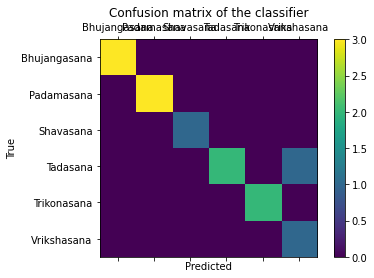

In [70]:
from sklearn.metrics import confusion_matrix

labels = ['Bhujangasana','Padamasana','Shavasana','Tadasana','Trikonasana','Vrikshasana']
cm = confusion_matrix(y_test,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [74]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9230769230769231

In [75]:
# hamming loss
hamming_loss = metrics.hamming_loss(y_test, y_pred)
hamming_loss 

0.07692307692307693